# Exercise sheet 4

*Most of the content on this sheet is adopted from the free coursera.org course "Neural Networks and Deep Learning", Week 4.*

we will code all components needed to build and train a (deep) neural network. There will be multiple functions to implement, most of which are followed by a verification block that allows you to check if your function works as expected.

 

**A note on the used notation**:

- Superscript $[l]$ denotes a quantity associated with the $l^{th}$ layer. 
    - Example: $a^{[L]}$ is the $L^{th}$ layer activation. $W^{[L]}$ and $b^{[L]}$ are the $L^{th}$ layer parameters.
- Superscript $(i)$ denotes a quantity associated with the $i^{th}$ example. 
    - Example: $x^{(i)}$ is the $i^{th}$ training example.
- Lowerscript $i$ denotes the $i^{th}$ entry of a vector.
    - Example: $a^{[l]}_i$ denotes the $i^{th}$ entry of the $l^{th}$ layer's activations).


We start with loading some standard libraries.

In [1]:
# plt to plot figures
import matplotlib.pyplot as plt
# numpy for array/matrix operations
import numpy as np
# to be able to load matlab data files
from scipy.io import loadmat

# we set a seed variable for functions that use randomization (e.g. when shuffling data samples)
# this way, we can have reproducible results even with randomization
RANDOM_STATE = 2
np.random.seed(RANDOM_STATE)

## 1) Outline

To build your neural network, you will be implementing several "helper functions". These helper functions can be used to build a L-layer neural network. Each small helper function you will implement will have instructions that will walk you through the necessary steps. Here is an outline of this assignment, you will:

- Initialize the parameters for an L-layer neural network.
- Implement the forward propagation module (shown in purple in the figure below).
    - Complete the LINEAR part of a layer's forward propagation step (resulting in output Z).
    - Implement activation functions (relu/sigmoid)
    - Combine the previous two steps into a new [LINEAR->ACTIVATION] forward function.
    - Stack the [LINEAR->RELU] forward function L-1 time (for layers 1 through L-1) and add a [LINEAR->SIGMOID] at the end (for the final layer L). This gives you a new L_model_forward function.
- Compute the loss.
- Implement the backward propagation module (denoted in red in the figure below).

    - Complete the LINEAR part of a layer's backward propagation step.
    - Functions for calculating the gradient of the ACTIVATION functions are given (relu_backward/sigmoid_backward)
    - Combine the previous two steps into a new [LINEAR->ACTIVATION] backward function.
    - Stack [LINEAR->RELU] backward L-1 times and add [LINEAR->SIGMOID] backward in a new L_model_backward function

- Finally update the parameters using gradient descent.

Note that for every forward function, there is a corresponding backward function. That is why at every step of your forward module you will be storing some values in a cache. The cached values are useful for computing gradients. In the backpropagation module you will then use the cache to calculate the gradients. This assignment will show you exactly how to carry out each of these steps.


## 2) Initialization of L-layer Neural Network

Complete implementing the function below to randomly initialize parameters (weight matrices and bias vectors) for a (deep) L-layer neural network. Make sure that dimensions of the parameter matrices/vectors match between each layer (assert calls for this are already implemented).

Notes:
- Initialize weight matrices with small normal distributed numbers. Use np.random.randn(matrix_shape) * 0.01.
- Initialize bias vectors with zeros. Use np.zeros(vector_shape).

In [2]:
def initialize_parameters(layer_dims):
    """
    Argument:
    layer_dims -- python array (list) containing the dimensions of each layer in our network:
                    e.g. a network with input layer (e.g. 4 features), two hidden layers (e.g. each with 5 nodes)
                    and output layer (e.g. 1 node for binary classification using sigmoid activation) would result 
                    in layer_dims=[4,5,5,1]
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
                    
    """
    np.random.seed(RANDOM_STATE)
    parameters = {}
    L = len(layer_dims)
    
    for l in range(1, L):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))
        ### END CODE HERE ###

        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

    return parameters    

**Verify that code works as expected**

Compare output of your implemented function with expected output below.

In [3]:
example_layer_dims = [4,5,5,1]

parameters = initialize_parameters(example_layer_dims)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

total_number_of_parameters = 0
for layer in range(1,len(example_layer_dims)):
    total_number_of_parameters += np.prod(np.shape(parameters[f"W{layer}"]))
    total_number_of_parameters += np.prod(np.shape(parameters[f"b{layer}"]))
print("Total number of parameters:", total_number_of_parameters)

W1 = [[-4.16757847e-03 -5.62668272e-04 -2.13619610e-02  1.64027081e-02]
 [-1.79343559e-02 -8.41747366e-03  5.02881417e-03 -1.24528809e-02]
 [-1.05795222e-02 -9.09007615e-03  5.51454045e-03  2.29220801e-02]
 [ 4.15393930e-04 -1.11792545e-02  5.39058321e-03 -5.96159700e-03]
 [-1.91304965e-04  1.17500122e-02 -7.47870949e-03  9.02525097e-05]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-8.78107893e-03 -1.56434170e-03  2.56570452e-03 -9.88779049e-03
  -3.38821966e-03]
 [-2.36184031e-03 -6.37655012e-03 -1.18761229e-02 -1.42121723e-02
  -1.53495196e-03]
 [-2.69056960e-03  2.23136679e-02 -2.43476758e-02  1.12726505e-03
   3.70444537e-03]
 [ 1.35963386e-02  5.01857207e-03 -8.44213704e-03  9.76147160e-08
   5.42352572e-03]
 [-3.13508197e-03  7.71011738e-03 -1.86809065e-02  1.73118467e-02
   1.46767801e-02]]
b2 = [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Total number of parameters: 61


#### Expected output:

W1 = [[-4.16757847e-03 -5.62668272e-04 -2.13619610e-02  1.64027081e-02]
 [-1.79343559e-02 -8.41747366e-03  5.02881417e-03 -1.24528809e-02]
 [-1.05795222e-02 -9.09007615e-03  5.51454045e-03  2.29220801e-02]
 [ 4.15393930e-04 -1.11792545e-02  5.39058321e-03 -5.96159700e-03]
 [-1.91304965e-04  1.17500122e-02 -7.47870949e-03  9.02525097e-05]]
 
b1 = [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]

W2 = [[-8.78107893e-03 -1.56434170e-03  2.56570452e-03 -9.88779049e-03
  -3.38821966e-03]
 [-2.36184031e-03 -6.37655012e-03 -1.18761229e-02 -1.42121723e-02
  -1.53495196e-03]
 [-2.69056960e-03  2.23136679e-02 -2.43476758e-02  1.12726505e-03
   3.70444537e-03]
 [ 1.35963386e-02  5.01857207e-03 -8.44213704e-03  9.76147160e-08
   5.42352572e-03]
 [-3.13508197e-03  7.71011738e-03 -1.86809065e-02  1.73118467e-02
   1.46767801e-02]]

b2 = [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


## 3) Forward propagation

Now that we have initialized the parameters, we implement the forward propagation module. We start by implementing some basic functions that are needed later on. We'll complete three functions in this part:

    - LINEAR
    - LINEAR -> ACTIVATION where ACTIVATION will be either ReLU or Sigmoid.
    - [LINEAR -> RELU] x (L-1) -> LINEAR -> SIGMOID (i.e. whole model)

### 3.1) Linear Forward Function

We start with the linear forward function. This function calculates the equation:

$$Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}$$

with $A^{[0]} = X$ (i.e. the matrix of data samples).

Remember that $W^{[l]}A^{[l-1]}$ calculates the dot product between two matrices.

In [4]:
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    Z = np.dot(W,A) + b
    ### END CODE HERE ###
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

**Verify that code works as expected**

Compare output of your implemented function with expected output below.

In [5]:
np.random.seed(RANDOM_STATE)
example_batch_size = 1  # number of data samples in this batch

A = np.random.randn(example_layer_dims[0], example_batch_size)
W = np.random.randn(example_layer_dims[1], example_layer_dims[0])
b = np.random.randn(example_layer_dims[1], 1)

Z, linear_cache = linear_forward(A, W, b)
print("Z = " + str(Z))

Z = [[-2.66089417]
 [ 2.83770075]
 [-2.7214624 ]
 [ 0.36664977]
 [-3.21640702]]


#### Expected output: 

Z = [[-2.66089417]
 [ 2.83770075]
 [-2.7214624 ]
 [ 0.36664977]
 [-3.21640702]]

### 3.2) Activation Functions

There are various different activation functions. In this exercise, we implement two activation functions that were presented in the lecture: sigmoid and ReLU. We return the input (Z) as well (for simplification of error backpropagation calculations later on).

Note: the backward functions for both activation functions (i.e. derivative including application of chain rule - therefore not exactly the same as in the lecture) is already given.

In [6]:
# activation functions

def sigmoid(Z):
    ### START CODE HERE ### (≈ 1 line of code)
    A = 1/(1+np.exp(-Z))
    ### END CODE HERE ###
    return A, Z

def relu(Z):
    ### START CODE HERE ### (≈ 1 line of code)
    A = np.maximum(Z,0)
    ### END CODE HERE ###
    assert(A.shape == Z.shape)
    return A, Z


# backward functions (includes chain rule application)

def sigmoid_backward(dA, Z):    
    # version from the lecture:
    dZ = dA * np.exp(-Z) / (1 + np.exp(-Z)) ** 2
    # alternative version
    #s = 1/(1+np.exp(-Z))
    #dZ = dA * s * (1 - s)
    assert (dZ.shape == Z.shape)
    return dZ

def relu_backward(dA, Z):
    dZ = np.zeros(dA.shape)
    dZ[Z>0] = 1
    dZ *= dA
    assert (dZ.shape == Z.shape)
    return dZ

### 3.3) Linear Activation Forward Function

One layer in a neural network usually consists of a linear function that is followed by an activation function (and thus the two combined are counted as one layer). For convenience, we group these two operations into one function (LINEAR->ACTIVATION). Implement a function that does the LINEAR forward step followed by an ACTIVATION forward step.

The mathematical formulation is given as: 
$A^{[l]} = g(Z^{[l]}) = g(W^{[l]}A^{[l-1]} +b^{[l]})$ 

where the activation "g" can be sigmoid() or relu(). Use linear_forward() from 3.1) and the correct activation function from 3.2) to implement the function below.

In [7]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python tuple containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev, W, b) # This "linear_cache" contains (A_prev, W, b)
        A, activation_cache = sigmoid(Z) # This "activation_cache" contains "Z"
        ### END CODE HERE ###
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev, W, b) # This "linear_cache" contains (A_prev, W, b)
        A, activation_cache = relu(Z) # This "activation_cache" contains "Z"
        ### END CODE HERE ###
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

**Verify that code works as expected**

Compare output of your implemented function with expected output below.

In [8]:
np.random.seed(RANDOM_STATE)
example_batch_size = 1  # number of data samples in this batch

A_prev = np.random.randn(example_layer_dims[0], example_batch_size)
W = np.random.randn(example_layer_dims[1], example_layer_dims[0])
b = np.random.randn(example_layer_dims[1], 1) 

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = " + str(A))

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
print("With ReLU: A = " + str(A))



With sigmoid: A = [[0.06532072]
 [0.94467943]
 [0.06171873]
 [0.5906492 ]
 [0.03855294]]
With ReLU: A = [[0.        ]
 [2.83770075]
 [0.        ]
 [0.36664977]
 [0.        ]]


#### Expected output:
    
With sigmoid: A = [[0.06532072]
 [0.94467943]
 [0.06171873]
 [0.5906492 ]
 [0.03855294]]
 
With ReLU: A = [[0.        ]
 [2.83770075]
 [0.        ]
 [0.36664977]
 [0.        ]]


### 3.4) L-Layer Model

We can now use the implemented functions to build an L-layer neural network with a sigmoid activation function in the output layer. Write a function that creates a neural network with L-1 layers using linear_activation_forward with ReLU activation, then finishes with the output layer, using linear_activation_forward with sigmoid activation.

Note on counting layers: when counting layers in a neural network, we only count layers with learnable parameters (weight matrices / bias vectors). This is why the input layer is usually NOT counted.

In [9]:
def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        ### START CODE HERE ### (≈ 2 lines of code)
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], "relu")
        caches.append(cache)
        ### END CODE HERE ###
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    ### START CODE HERE ### (≈ 2 lines of code)
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], "sigmoid")
    caches.append(cache)
    ### END CODE HERE ###
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches


**Verify that code works as expected**

Compare output of your implemented function with expected output below.

In [10]:
example_layer_dims = [4,5,5,1]

np.random.seed(RANDOM_STATE)
example_batch_size = 1  # number of data samples in this batch

A_prev = np.random.randn(example_layer_dims[0], example_batch_size)
W = np.random.randn(example_layer_dims[1], example_layer_dims[0])
b = np.random.randn(example_layer_dims[1], 1)

X = A_prev
parameters = initialize_parameters(example_layer_dims)


AL, caches = L_model_forward(X, parameters)
print("AL = " + str(AL))
print("Length of caches list = " + str(len(caches)))


AL = [[0.49999827]]
Length of caches list = 3


#### Expected output:

AL = [[0.49999827]]  
Length of caches list = 3

## 4) Loss function

So far we have implemented an L-layer neural network with full forward propagation, that takes input X (matrix of samples) and outputs a row vector containing the network's predictions. We also store all intermediate values that are calculated during forward propagation in "caches". Output of the neural net is given in $A^{[L]}$, which we can use to compute the loss of the net's predictions.

We will now implement the loss calculation. In this exercise, we use binary cross entropy loss, which is given as:

$$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\ln\left(a^{[L] (i)}\right) + (1-y^{(i)})\ln\left(1- a^{[L](i)}\right))$$

with  
m = number of samples  
$a^{[L]}$ = output of the model   
y = ground truth class (0 or 1)

In [11]:
def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    ### START CODE HERE ### (≈ 1 lines of code)
    cost = (-1/m) * (np.dot(Y, np.log(AL).T) + np.dot((1-Y), np.log(1-AL).T))
    ### END CODE HERE ###
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

**Verify that code works as expected**

Compare output of your implemented function with expected output below.

In [12]:
np.random.seed(RANDOM_STATE)

Y = np.array(np.random.randint(0,1, size=(1,1)))

#Y, AL = compute_cost_test_case()

print("cost = " + str(compute_cost(AL, Y)))



cost = 0.6931437185364475


#### Expected output:
    
cost = 0.6931437185364475

## 5) Backward propagation

Following the forward propagation of our network, we now need to implement helper functions for backpropagation. Remember that backpropagation is used to calculate the gradient of the loss function with respect to the parameters, so that we can update them using gradient descent and reduce the defined loss (and classification error as a consequence). These weight/bias updates represent learning of the network.

Similar to forward propagation, we build the backward propagation in three steps:

- LINEAR backward
- LINEAR -> ACTIVATION backward where ACTIVATION computes the derivative of either the ReLU or sigmoid activation
[LINEAR -> RELU]
- (L-1) -> LINEAR -> SIGMOID backward (whole model)

### 5.1) Linear backward function

For layer $l$, the linear (forward) function is given as: $Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]}$ (followed by an activation).

Suppose we have already calculated the derivative $dZ^{[l]} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}}$. We need to get $(dW^{[l]}, db^{[l]}, dA^{[l-1]})$ which are used by gradient descent to update the parameters $(W^{[l]}, b^{[l]})$.

$dW^{[l]}, db^{[l]}, dA^{[l-1]}$ are computed using $dZ^{[l]}$ as follows:

$$ dW^{[l]} = \frac{\partial \mathcal{J} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T}$$
$$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}$$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]}$$

Use these formulas as reference to implement the function below.

In [13]:
def linear_backward(dZ, cache):
    # Here cache is "linear_cache" containing (A_prev, W, b) coming from the forward propagation in the current layer
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    ### START CODE HERE ### (≈ 3 lines of code)
    dW = (1/m) * np.dot(dZ, A_prev.T)
    db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T,dZ)
    ### END CODE HERE ###
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

**Verify that code works as expected**

Compare output of your implemented function with expected output below.

In [14]:
example_layer_dims = [4,10,10,1]

np.random.seed(RANDOM_STATE)
#example_batch_size = 1  # number of data samples in this batch

#A_prev = np.random.randn(example_layer_dims[2], example_batch_size)
#W = np.random.randn(example_layer_dims[3], example_layer_dims[2])
#b = np.random.randn(example_layer_dims[3], 1)

#linear_cache = (A_prev, W, b)
linear_cache = caches[-1][0]

#Z, _ = linear_forward(A_prev, W, b)

Z, _ = linear_forward(linear_cache[0], linear_cache[1], linear_cache[2])

dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
dZ = sigmoid_backward(dAL, Z)

#dZ, linear_cache = linear_backward_test_case()
dA_prev, dW, db = linear_backward(dZ, linear_cache)
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

dA_prev = [[-0.00167838]
 [ 0.00305669]
 [ 0.00023985]
 [-0.00414566]
 [ 0.00043855]]
dW = [[0.         0.         0.         0.00041755 0.        ]]
db = [[0.49999827]]


#### Expected output:
    
dA_prev = [[-0.00167838]
 [ 0.00305669]
 [ 0.00023985]
 [-0.00414566]
 [ 0.00043855]]
 
dW = [[0.         0.         0.         0.00041755 0.        ]]

db = [[0.49999827]]


### 5.2) Linear activation backward function

Next, we'll implement a function that merges the backward step in linear_backward and the backward step for the activation function, i.e. we implement the backpropgation for a layer consisting of LINEAR->ACTIVATION. Note that we have already implemented the backward step (i.e. calculation of the derivative) for the activation functions sigmoid and ReLU with consideration of the chain rule used in backpropagation further above (called sigmoid_backward and relu_backward). 
Mathematically, what happens in those functions is that if $g(.)$ is the activation function, then 
    `sigmoid_backward` and `relu_backward` compute $$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]})$$
    
Use sigmoid_backward, relu_backward and linear_backward to complete the function below.  

In [15]:
def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        ### START CODE HERE ### (≈ 1 line of code)
        dZ = relu_backward(dA, activation_cache)
        ### END CODE HERE ###
        
    elif activation == "sigmoid":
        ### START CODE HERE ### (≈ 1 line of code)
        dZ = sigmoid_backward(dA, activation_cache)
        ### END CODE HERE ###
    
    ### START CODE HERE ### (≈ 1 line of code)
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
    ### END CODE HERE ###
    
    return dA_prev, dW, db

**Verify that code works as expected**

Compare output of your implemented function with expected output below.

In [16]:
linear_activation_cache = caches[-1]

dA_prev, dW, db = linear_activation_backward(dAL, linear_activation_cache, activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

linear_activation_cache = caches[-2]

dA_prev, dW, db = linear_activation_backward(dA_prev, linear_activation_cache, activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

sigmoid:
dA_prev = [[-0.00167838]
 [ 0.00305669]
 [ 0.00023985]
 [-0.00414566]
 [ 0.00043855]]
dW = [[0.         0.         0.         0.00041755 0.        ]]
db = [[0.49999827]]

relu:
dA_prev = [[-5.63658256e-05]
 [-2.08053040e-05]
 [ 3.49982475e-05]
 [-4.04677628e-10]
 [-2.24841050e-05]]
dW = [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-3.08050683e-04  0.00000000e+00 -1.27432876e-04  0.00000000e+00
  -6.44344527e-05]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]]
db = [[ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [-0.00414566]
 [ 0.        ]]


#### Expected output:


##### sigmoid:

sigmoid:
dA_prev = [[-0.00167838]
 [ 0.00305669]
 [ 0.00023985]
 [-0.00414566]
 [ 0.00043855]]
 
dW = [[0.         0.         0.         0.00041755 0.        ]]

db = [[0.49999827]]


##### relu:

dA_prev = [[-5.63658256e-05]
 [-2.08053040e-05]
 [ 3.49982475e-05]
 [-4.04677628e-10]
 [-2.24841050e-05]]
 
dW = [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-3.08050683e-04  0.00000000e+00 -1.27432876e-04  0.00000000e+00
  -6.44344527e-05]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]]

db = [[ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [-0.00414566]
 [ 0.        ]]

### 5.3) L-Layer Model Backward

We can now implement the loss backpropagation for the whole network. Recall that when we run the L_model_forward function, in each step we store a cache which contains (A,W,b, and Z). In the backpropagation module, we'll use those variables to compute the gradients. Therefore, in the L_model_backward function, we go through all the hidden layers backward, starting from layer L. In each step, we use the cached values for the l-th layer to backpropagate the error through that layer.

**Initializing backpropagation:** To backpropagate the loss through our network with final sigmoid activation in the output layer, we know that the output is given as: $A^{[L]} = \sigma(Z^{[L]})$
. Our code thus needs to compute $dAL= \frac{\partial \mathcal{L}}{\partial A^{[L]}}$, where $\mathcal{L}$ is our loss function.

Thus, we need the partial derivative of our loss function with respect to AL, which is given by the following formula:

$dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))$

We can use this post-activation gradient dAL to keep going backward by feeding dAL into our LINEAR->SIGMOID backward function (which will use the cached values stored by the L_model_forward function). After that, we'll have to use a for loop to iterate through all the remaining layers using our LINEAR->RELU backward function. As output of the function, all calculated dA, dW, and db (i.e. for each layer) has to be stored in a python dict (called "grads", see below) using the naming conventions outlined below.

In [17]:
def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    ### START CODE HERE ### (1 line of code)
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    ### END CODE HERE ###
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    ### START CODE HERE ### (approx. 2 lines)
    current_cache = caches[L-1] # Last Layer
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, "sigmoid")
    ### END CODE HERE ###
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        ### START CODE HERE ### (approx. 5 lines)
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
        ### END CODE HERE ###

    return grads


**Verify that code works as expected**

Compare output of your implemented function with expected output below.

In [18]:
#AL, Y_assess, caches = L_model_backward_test_case()

grads = L_model_backward(AL, Y, caches)
#print_grads(grads)
print("dW1 = {}\ndb1 = {}\ndA1 = {}\n".format(grads['dW1'], grads['db1'], grads['dA1']))

dW1 = [[ 2.34909002e-05  3.17152617e-06  1.20408457e-04 -9.24552184e-05]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.45857943e-05 -1.96924035e-06 -7.47631197e-05  5.74066037e-05]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 9.37042720e-06  1.26510925e-06  4.80304573e-05 -3.68800211e-05]]
db1 = [[-5.63658256e-05]
 [ 0.00000000e+00]
 [ 3.49982475e-05]
 [ 0.00000000e+00]
 [-2.24841050e-05]]
dA1 = [[-5.63658256e-05]
 [-2.08053040e-05]
 [ 3.49982475e-05]
 [-4.04677628e-10]
 [-2.24841050e-05]]



#### Expected output:

dW1 = [[ 2.34909002e-05  3.17152617e-06  1.20408457e-04 -9.24552184e-05]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.45857943e-05 -1.96924035e-06 -7.47631197e-05  5.74066037e-05]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 9.37042720e-06  1.26510925e-06  4.80304573e-05 -3.68800211e-05]]

db1 = [[-5.63658256e-05]
 [ 0.00000000e+00]
 [ 3.49982475e-05]
 [ 0.00000000e+00]
 [-2.24841050e-05]]

dA1 = [[-5.63658256e-05]
 [-2.08053040e-05]
 [ 3.49982475e-05]
 [-4.04677628e-10]
 [-2.24841050e-05]]

### 5.4) Update parameters

We now have everything to update the parameters (weight matrices and bias vectors) of the model using gradient descent. These updates are essentially what constitutes "learning" in the neural network. We update weights and biases as follows:

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} $$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} $$

where $\alpha$ is the learning rate.

In [19]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    ### START CODE HERE ### (≈ 3 lines of code)
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
    ### END CODE HERE ###
    return parameters

**Verify that code works as expected**

Compare output of your implemented function with expected output below.

In [20]:
parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))
print ("W3 = "+ str(parameters["W3"]))
print ("b3 = "+ str(parameters["b3"]))


W1 = [[-4.16992756e-03 -5.62985425e-04 -2.13740018e-02  1.64119536e-02]
 [-1.79343559e-02 -8.41747366e-03  5.02881417e-03 -1.24528809e-02]
 [-1.05780636e-02 -9.08987923e-03  5.52201676e-03  2.29163395e-02]
 [ 4.15393930e-04 -1.11792545e-02  5.39058321e-03 -5.96159700e-03]
 [-1.92242008e-04  1.17498857e-02 -7.48351254e-03  9.39405118e-05]]
b1 = [[ 5.63658256e-06]
 [ 0.00000000e+00]
 [-3.49982475e-06]
 [ 0.00000000e+00]
 [ 2.24841050e-06]]
W2 = [[-8.78107893e-03 -1.56434170e-03  2.56570452e-03 -9.88779049e-03
  -3.38821966e-03]
 [-2.36184031e-03 -6.37655012e-03 -1.18761229e-02 -1.42121723e-02
  -1.53495196e-03]
 [-2.69056960e-03  2.23136679e-02 -2.43476758e-02  1.12726505e-03
   3.70444537e-03]
 [ 1.36271437e-02  5.01857207e-03 -8.42939375e-03  9.76147160e-08
   5.42996917e-03]
 [-3.13508197e-03  7.71011738e-03 -1.86809065e-02  1.73118467e-02
   1.46767801e-02]]
b2 = [[0.        ]
 [0.        ]
 [0.        ]
 [0.00041457]
 [0.        ]]
W3 = [[-0.00335677  0.00611341  0.00047971 -0.00833

#### Expected output:

W1 = [[-4.16992756e-03 -5.62985425e-04 -2.13740018e-02  1.64119536e-02]
 [-1.79343559e-02 -8.41747366e-03  5.02881417e-03 -1.24528809e-02]
 [-1.05780636e-02 -9.08987923e-03  5.52201676e-03  2.29163395e-02]
 [ 4.15393930e-04 -1.11792545e-02  5.39058321e-03 -5.96159700e-03]
 [-1.92242008e-04  1.17498857e-02 -7.48351254e-03  9.39405118e-05]]

b1 = [[ 5.63658256e-06]
 [ 0.00000000e+00]
 [-3.49982475e-06]
 [ 0.00000000e+00]
 [ 2.24841050e-06]]

W2 = [[-8.78107893e-03 -1.56434170e-03  2.56570452e-03 -9.88779049e-03
  -3.38821966e-03]
 [-2.36184031e-03 -6.37655012e-03 -1.18761229e-02 -1.42121723e-02
  -1.53495196e-03]
 [-2.69056960e-03  2.23136679e-02 -2.43476758e-02  1.12726505e-03
   3.70444537e-03]
 [ 1.36271437e-02  5.01857207e-03 -8.42939375e-03  9.76147160e-08
   5.42996917e-03]
 [-3.13508197e-03  7.71011738e-03 -1.86809065e-02  1.73118467e-02
   1.46767801e-02]]

b2 = [[0.        ]
 [0.        ]
 [0.        ]
 [0.00041457]
 [0.        ]]

W3 = [[-0.00335677  0.00611341  0.00047971 -0.00833311  0.0008771 ]]

b3 = [[-0.04999983]]

## 6) Optional

We now have implemented all functions that are needed to build and train a deep neural network for a binary classification task. Try putting it all together and train a DNN for the last binary classification task on Exercise sheet 3 (data given in "ex3data2.mat").   



#### Example of model training using our own implemented neural network functions

In [21]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.001, num_iterations = 100, print_cost=False, parameters=None):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    if parameters is None:
        parameters = initialize_parameters(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)

        # Compute cost.
        cost = compute_cost(AL, Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 1000== 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

#### Helper function to evaluate our neural network with a given dataset

In [22]:
def predict(X, y, parameters):
    """
    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)

    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p

#### Load and preprocess the dataset from last week
Note that your notebook needs to be able to access the datafile ex3data2.mat from last exercise sheet (e.g. just dump it in the same folder as this notebook).

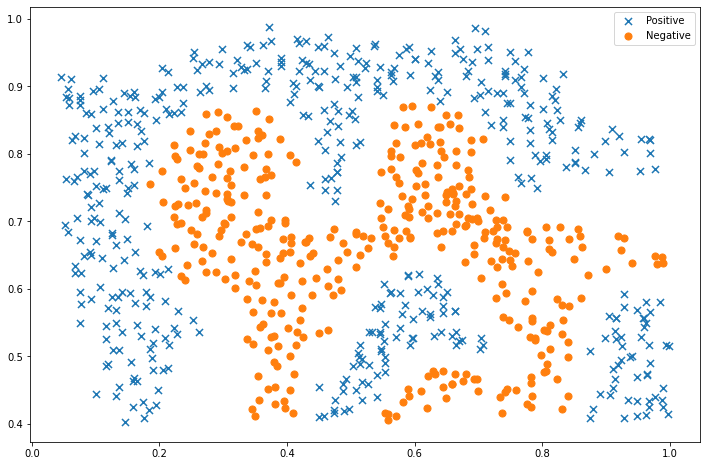

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Load new dataset
raw_data = loadmat('ex3data2.mat')  # datafile from last exercise sheet
X_all,y_all = raw_data['X'], raw_data['y']

# visualize the data
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X_all[np.where(y_all==1)[0],0],X_all[np.where(y_all==1)[0],1], s=50, marker='x', label='Positive')
ax.scatter(X_all[np.where(y_all==0)[0],0],X_all[np.where(y_all==0)[0],1], s=50, marker='o', label='Negative')
ax.legend()
plt.show()

# for comparison/reproducibility 
RANDOM_STATE = 2
np.random.seed(RANDOM_STATE)

# create train/val/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all, test_size=0.20, shuffle=True, random_state=RANDOM_STATE)

# z-normalization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# change sample representation to match expected input in our NN implementation
X_train_st = np.swapaxes(X_train_st, 0,1)
X_test_st = np.swapaxes(X_test_st, 0,1)
y_train = np.swapaxes(y_train, 0,1)
y_test = np.swapaxes(y_test, 0,1)

#### Train and evaluate

Cost after iteration 0: 0.693070
Cost after iteration 1000: 0.690272
Cost after iteration 2000: 0.688563
Cost after iteration 3000: 0.687511
Cost after iteration 4000: 0.686854
Cost after iteration 5000: 0.686433
Cost after iteration 6000: 0.686152
Cost after iteration 7000: 0.685949
Cost after iteration 8000: 0.685787
Cost after iteration 9000: 0.685642
Cost after iteration 10000: 0.685496
Cost after iteration 11000: 0.685338
Cost after iteration 12000: 0.685157
Cost after iteration 13000: 0.684945
Cost after iteration 14000: 0.684691
Cost after iteration 15000: 0.684384
Cost after iteration 16000: 0.684012
Cost after iteration 17000: 0.683559
Cost after iteration 18000: 0.683013
Cost after iteration 19000: 0.682356
Cost after iteration 20000: 0.681568
Cost after iteration 21000: 0.680625
Cost after iteration 22000: 0.679507
Cost after iteration 23000: 0.678182
Cost after iteration 24000: 0.676633
Cost after iteration 25000: 0.674828
Cost after iteration 26000: 0.672755
Cost after ite

Cost after iteration 219000: 0.364117
Cost after iteration 220000: 0.363777
Cost after iteration 221000: 0.363442
Cost after iteration 222000: 0.363108
Cost after iteration 223000: 0.362785
Cost after iteration 224000: 0.362467
Cost after iteration 225000: 0.362147
Cost after iteration 226000: 0.361806
Cost after iteration 227000: 0.361470
Cost after iteration 228000: 0.361158
Cost after iteration 229000: 0.360864
Cost after iteration 230000: 0.360582
Cost after iteration 231000: 0.360309
Cost after iteration 232000: 0.360046
Cost after iteration 233000: 0.359793
Cost after iteration 234000: 0.359546
Cost after iteration 235000: 0.359307
Cost after iteration 236000: 0.359075
Cost after iteration 237000: 0.358848
Cost after iteration 238000: 0.358628
Cost after iteration 239000: 0.358407
Cost after iteration 240000: 0.358193
Cost after iteration 241000: 0.357983
Cost after iteration 242000: 0.357781
Cost after iteration 243000: 0.357583
Cost after iteration 244000: 0.357389
Cost after i

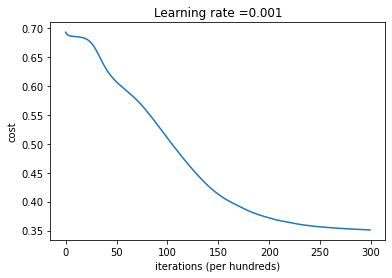

Performance on train: 
Accuracy: 0.818840579710145
Performance on test: 
Accuracy: 0.8150289017341039


In [24]:
# define network layers
layers_dims = [2,5,1] #  2-layer model

# run iterative training for 300k epochs (one epoch = one pass through the entire training data)
# sidenote: we're running batch gradient descent (all data at once)
parameters = L_layer_model(X_train_st, y_train, layers_dims, num_iterations = 300000, learning_rate=0.001, print_cost = True)

# use parameters of the NN after 50k epochs to evaluate train and test data 
print("Performance on train: ")
pred_train = predict(X_train_st, y_train, parameters)
print("Performance on test: ")
pred_test = predict(X_test_st, y_test, parameters)

#### Comparison with sklearn
For comparison: using a roughly equivalent sklearn neural network implementation. Notice the much faster runtime.

In [26]:
# for comparison: using roughly equivalent sklearn neural network
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='sgd', learning_rate="constant", alpha=0.001, hidden_layer_sizes=(5,5), 
                    random_state=1, max_iter=300000)

clf.fit(np.swapaxes(X_train_st, 0,1), np.squeeze(y_train))

print(clf.score(np.swapaxes(X_train_st, 0,1), np.squeeze(y_train)))
print(clf.score(np.swapaxes(X_test_st, 0,1), np.squeeze(y_test)))

0.7971014492753623
0.815028901734104



- 7.1 ) Describe the components of a Multi Layer Perceptron.

The MLP consists of three types of layers: the input layer, output layer and hidden layer. The input layer receives the input signal to be processed. The required task such as prediction and classification is performed by the output layer. An arbitrary number of hidden layers that are placed in between the input and output layer are the true computational engine of the MLP.

- 7.2 ) What do Neural Networks need to have to be able to estimate non-linear relationships in the data?

Neural Networks need non-linear activation functions in their layers (softmax, tanh, RELU) to learn non-linear relationships.  

- 7.3 ) For a binary classification task on 5 input features; Imagine a deep Neural Network that consists of 3 hidden, fully connected layers with 1000, 500 and 1000 nodes respectively. How many total weights does the network have?

Generally:

$ Number\_of\_Weights =  Weights_{Input} \times Weights_{H1} + Weights_{H1} \times Weights_{H2} + Weights_{H2} \times Weights_{H3} +  Weights_{H3} \times Output$

Considering biases this yields:

$ = ((5+1) \times) + (1001\times500) + (501\times1000) + (1001\times2) = 1009502 $


- 7.4 ) Describe a problem that large and very deep Neural Network architectures can have for small data sets.

A common problem that arises is $ \textit{Overfitting} $ of the Neural Network. When the network tries to learn too much or too many details in the training data along with the noise from the training data, it can result in poor performance on unseen data in the test dataset. When this happens, the network fails to generalize the features/patterns found in the training data.

- 7.5 ) Describe how the prediction error for the training samples is used to estimate the weights of a deep Neural Network.

The impact of the weights of a neural networks are calculated through a $\textit{back-propagation} $ of the errors.
Here, Back-propagation is an automatic differentiation algorithm for calculating the impact of the weights (in form of gradients) in a neural network graph structure. 

Together with an optimization (learning) algorithm like $ \textit{Gradient Descent} $, the influence of the prediction errors in the output layer (as defined by a loss function like Cross-Entropy-Loss) for a sample or batch of samples are used to determine the update of each weight of the previous layer. This procedure is repeated layer by layer, back to the first layer.



In [2]:
((5+1) *1000) + (1001*500) + (501*1000) + (1001*2)

1009502